# Tamkeen School v3 Alkhobar 2019 Evaluation

## Importing the libraries

In [1]:
import pandas as p
import numpy as n

#to visualize the data
import seaborn as s
import matplotlib.pyplot as plot

## Loading the dataset

In [2]:
#this method is from the pandas library and is used to load the data
data = p.read_csv('BlackFriday.csv')

## Simple explanation of the data given

In [3]:
print(data.shape) #to show the number of columns and rows

(537577, 12)


We were given an csv file, it contains data of transactions made in a retail store on Black Friday. As we can see above, this dataset contains 12 columns and 537577 rows.

## Classification of variables

In [4]:
data.head() #to show the first 5 rows of the dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


Conclusion:

We can also conclude that the target variable is Purchase and the predictor variables are all other variables.

# Problems and fixing them

Before analysis, I would like to fix some problems.

### Solution to problem 1

We can solve this problem using feature engineering.

In [6]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].apply(lambda x: x.split('+')[0].strip())

In [7]:
data['Stay_In_Current_City_Years']= data['Stay_In_Current_City_Years'].astype(int) #to convert column to int64

In [8]:
data['Stay_In_Current_City_Years'].unique() #check if problem is solved

array([2, 4, 3, 1, 0])

In [9]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,NaN,NaN,7969


Problem solved! By removing the '+' sign using the apply method and creating a function to split the string and also converting the column to int64, we were able to successfuly convert this variable to a numeric.

### Solution to problem 2

In this solution we will also use feature engineering, we will assign each age group to a number.

In [10]:
data['Age'].unique() #to show the unique values in 

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
data['Age'].replace(['0-17'], '1', inplace=True)
data['Age'].replace(['18-25'], '2', inplace=True)
data['Age'].replace(['26-35'], '3', inplace=True)
data['Age'].replace(['36-45'], '4', inplace=True)
data['Age'].replace(['46-50'], '5', inplace=True)
data['Age'].replace(['51-55'], '6', inplace=True)
data['Age'].replace(['55+'], '7', inplace=True)

In [12]:
data['Age'].unique() #to check if replacement is successful

array(['1', '7', '3', '5', '6', '4', '2'], dtype=object)

In [13]:
data['Age'] = data['Age'].astype(int) #to convert the column to int64

In [14]:
data['Age'].unique() #to check if variable converted to int64

array([1, 7, 3, 5, 6, 4, 2])

In [15]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,1,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,1,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,1,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,1,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,7,16,C,4,0,8,NaN,NaN,7969


Problem solved! We assigned numbers to each age group by using the replace method so now we can treat this variable as a numeric.

### Solution to problem 3

By feature engineering we can replace the letters with numbers.

In [16]:
data['City_Category'].replace(['A'], '1', inplace=True)
data['City_Category'].replace(['B'], '2', inplace=True)
data['City_Category'].replace(['C'], '3', inplace=True)

In [17]:
data['City_Category'].unique() #to check if replacement is successful

array(['1', '3', '2'], dtype=object)

In [18]:
data['City_Category'] = data['City_Category'].astype(int) #to convert column to int64

In [19]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,1,10,1,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,1,10,1,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,1,10,1,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,1,10,1,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,7,16,3,4,0,8,NaN,NaN,7969


Problem solved! Now we can treat the variable City_Category as a numeric.

### Solution to problem 4

Here we will handle the missing values, I will first check if deletion is an option.

In [20]:
temp = data.copy()
temp.dropna(inplace=True)

In [21]:
print('Original data:',data.shape)
print('Copy data:', temp.shape)

Original data: (537577, 12)
Copy data: (164278, 12)


In [22]:
print((temp.shape[0]/data.shape[0])*100)

30.55897108693266


Almost 69% of the data is lost by removing the NaN values, this is inefficeint. An alternative is filling the NaN values with mean, mode, or 0. I chose to replace the missing values with 0.0.

In [23]:
data['Product_Category_2'] = data['Product_Category_2'].fillna(0.0)
data['Product_Category_3'] = data['Product_Category_3'].fillna(0.0)

In [24]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,1,10,1,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,1,10,1,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,1,10,1,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,1,10,1,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,7,16,3,4,0,8,0.0,0.0,7969


Problem solved!

## Final look of the dataset

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null int64
Occupation                    537577 non-null int64
City_Category                 537577 non-null int64
Stay_In_Current_City_Years    537577 non-null int64
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 49.2+ MB


After fixing the problems, we need to change the data classifications of some variables.

Changes:

## Uni-variante analysis

### Occupation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a173144e0>]],
      dtype=object)

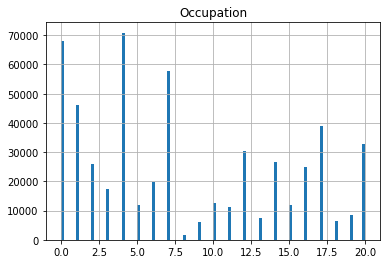

In [26]:
data.hist(column='Occupation', bins=100)

Conclusion:

### Gender

In [27]:
data.describe(include=['O'])

,Product_ID,Gender
count,537577,537577
unique,3623,2
top,P00265242,M
freq,1858,405380


Conclusion:

### Product_category_1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10380c748>]],
      dtype=object)

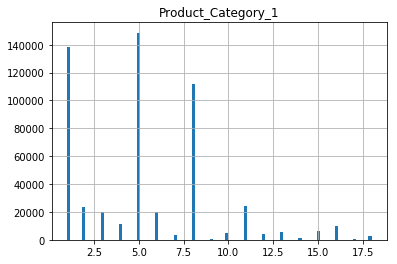

In [28]:
data.hist(column='Product_Category_1', bins=100)

Conclusion:

### Martial_Status

In [29]:
data.describe()

,User_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.000000,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,3.494755,8.08271,2.040567,1.859458,0.408797,5.295546,6.784907,3.871773,9333.859853
std,1.714393e+03,1.352583,6.52412,0.759627,1.289828,0.491612,3.750701,6.211618,6.265963,4981.022133
min,1.000001e+06,1.000000,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,185.000000
25%,1.001495e+06,3.000000,2.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,5866.000000
50%,1.003031e+06,3.000000,7.00000,2.000000,2.000000,0.000000,5.000000,5.000000,0.000000,8062.000000
75%,1.004417e+06,4.000000,14.00000,3.000000,3.000000,1.000000,8.000000,14.000000,8.000000,12073.000000
max,1.006040e+06,7.000000,20.00000,3.000000,4.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


Conclusion:

### City_Category

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17f57a90>]],
      dtype=object)

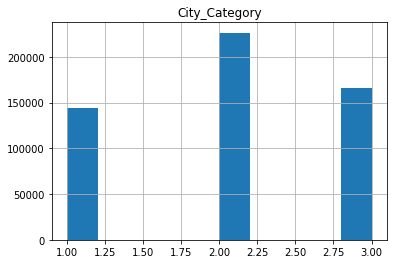

In [30]:
data.hist(column='City_Category')

Conclusion:

## Multi-variante analysis

### Age and Purchase

In [31]:
data[['Age', 'Purchase']].groupby(['Age']).count().sort_values(by='Purchase', ascending=False)

,Purchase
Age,
3,214690
4,107499
2,97634
5,44526
6,37618
7,20903
1,14707


In [32]:
data[['Age', 'Purchase']].groupby(['Age']).sum().sort_values(by='Purchase', ascending=False)

,Purchase
Age,
3,1999749106
4,1010649565
2,901669280
5,413418223
6,361908356
7,197614842
1,132659006


Conclusion:

### Product category 1 and Purchase

In [33]:
data[['Product_Category_1', 'Purchase']].groupby(['Product_Category_1']).sum().sort_values(by='Purchase', ascending=False)

,Purchase
Product_Category_1,
1,1882666325
5,926917497
8,840693394
6,319355286
2,264497242
3,200412211
16,143168035
11,112203088
10,99029631


In [34]:
data[['Product_Category_1', 'Purchase']].groupby(['Product_Category_1']).count().sort_values(by='Purchase', ascending=False)

,Purchase
Product_Category_1,
5,148592
1,138353
8,112132
11,23960
2,23499
6,20164
3,19849
4,11567
16,9697


Conclusion:

### Product_Category_1 and Gender

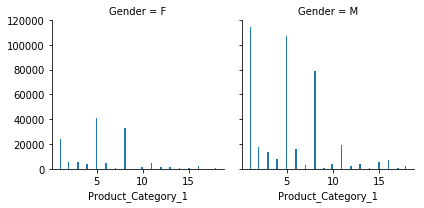

In [35]:
s.FacetGrid(data, col='Gender').map(plot.hist, 'Product_Category_1', bins=100)

Conclusion:

### City_Category and Occupation

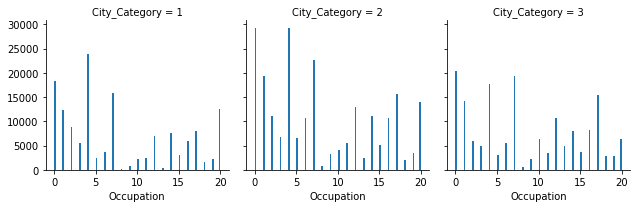

In [36]:
s.FacetGrid(data, col='City_Category').map(plot.hist, 'Occupation', bins=100)

Conclusion:

## Handling outliers

In [37]:
data.describe()

,User_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.000000,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,3.494755,8.08271,2.040567,1.859458,0.408797,5.295546,6.784907,3.871773,9333.859853
std,1.714393e+03,1.352583,6.52412,0.759627,1.289828,0.491612,3.750701,6.211618,6.265963,4981.022133
min,1.000001e+06,1.000000,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,185.000000
25%,1.001495e+06,3.000000,2.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,5866.000000
50%,1.003031e+06,3.000000,7.00000,2.000000,2.000000,0.000000,5.000000,5.000000,0.000000,8062.000000
75%,1.004417e+06,4.000000,14.00000,3.000000,3.000000,1.000000,8.000000,14.000000,8.000000,12073.000000
max,1.006040e+06,7.000000,20.00000,3.000000,4.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


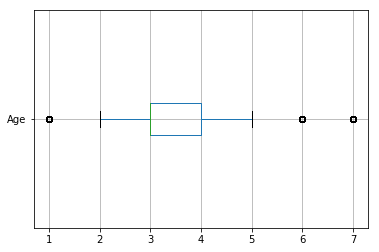

In [38]:
data.boxplot(['Age'], vert=False)

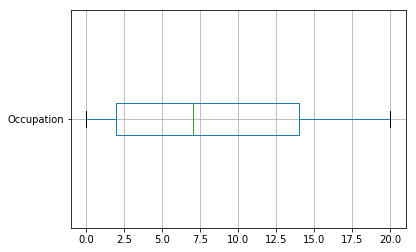

In [39]:
data.boxplot(['Occupation'], vert=False)

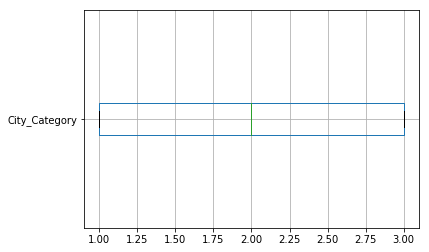

In [40]:
data.boxplot(['City_Category'], vert=False)

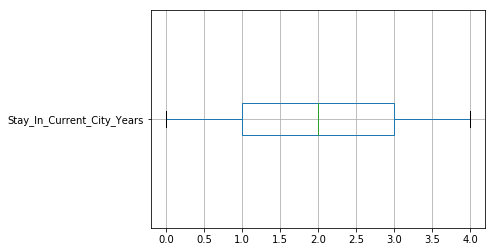

In [41]:
data.boxplot(['Stay_In_Current_City_Years'], vert=False)

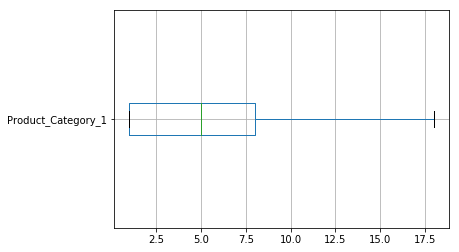

In [42]:
data.boxplot(['Product_Category_1'], vert=False)

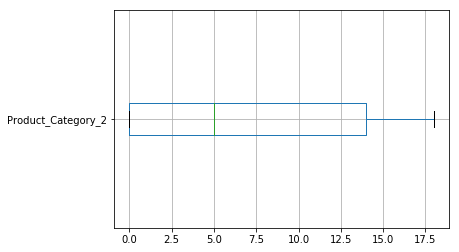

In [43]:
data.boxplot(['Product_Category_2'], vert=False)

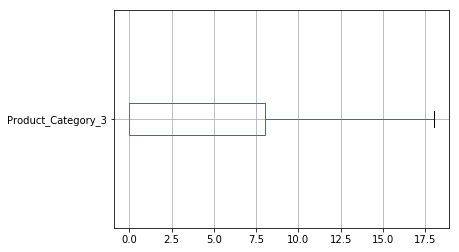

In [44]:
data.boxplot(['Product_Category_3'], vert=False)

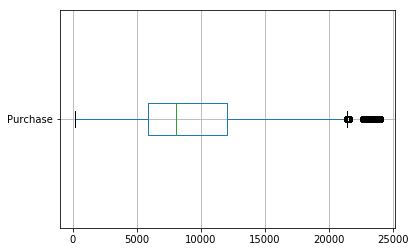

In [45]:
data.boxplot(['Purchase'], vert=False)

Conclusion:

## How can the data above benefit us?

### What are some techniques to increase sales?

### What are the factors that increase sales in this retail store?

Gender plays a big part in sale, City_Category too. Stay_In_Current_Years is one factor also, maybe the products are for short-term use. Marital status plays a role in sales, unmarried poeple tend to purchase more. Occupation is one of the factors, maybe the retail store sells products that a certain occupation need.

### What do clients that purchase the same products have in common?

We have to first find the most bought product.

In [46]:
data.describe(include=['O'])

,Product_ID,Gender
count,537577,537577
unique,3623,2
top,P00265242,M
freq,1858,405380


Product 'P00265242' is the most popular product, it was purchased 1858 times. Now lets see what the clients who purchased this product have in common.

In [47]:
temp = data.copy()
temp = temp[temp['Product_ID']=='P00265242']
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1858 entries, 399 to 537478
Data columns (total 12 columns):
User_ID                       1858 non-null int64
Product_ID                    1858 non-null object
Gender                        1858 non-null object
Age                           1858 non-null int64
Occupation                    1858 non-null int64
City_Category                 1858 non-null int64
Stay_In_Current_City_Years    1858 non-null int64
Marital_Status                1858 non-null int64
Product_Category_1            1858 non-null int64
Product_Category_2            1858 non-null float64
Product_Category_3            1858 non-null float64
Purchase                      1858 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 188.7+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bcceef0>]],
      dtype=object)

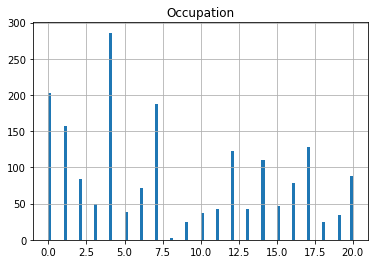

In [48]:
temp.hist(column='Occupation', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bcce668>]],
      dtype=object)

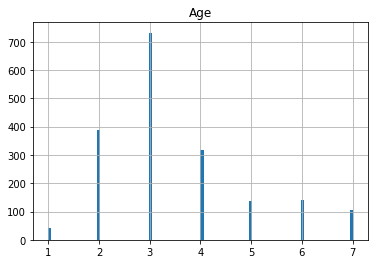

In [49]:
temp.hist(column='Age', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ba7dd30>]],
      dtype=object)

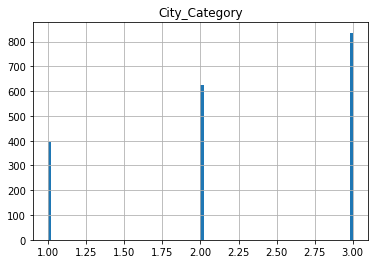

In [50]:
temp.hist(column='City_Category', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b7d9390>]],
      dtype=object)

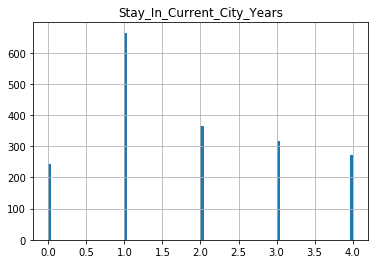

In [51]:
temp.hist(column='Stay_In_Current_City_Years', bins=100)

In [52]:
temp.describe(include=['O'])

,Product_ID,Gender
count,1858,1858
unique,1,2
top,P00265242,M
freq,1858,1353


What they have in common:
    - Most of them work in Occupation category 4.
    - The majority fall in the age group 26-35.
    - Also most of them live in city category C.
    - People who stay in current city for 1 year, mostly purchase the same product.
    - Most of them are males.

#### Najla Albaz